In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/global_disaster_response_2018_2024.csv")
df.head(3)

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978


In [ ]:
# Check data informations
def check(self):
    print("\nShape:")
    print(self.shape)
    print("\nData Types:")
    print(self.info())
    print("\nCheck NaN:")
    print(self.isnull().sum())
    print("\nCheck NaN as Percentage:")
    print((self.isnull().sum()/len(self))*100)
    print("\nOverall NaN valu as Percentage:")
    print(self.isnull().sum().sum()/(self.shape[0]*self.shape[1])*100)
    print("\nCheck Duplicates:")
    print(self.duplicated().sum())

check(df)


Shape:
(50000, 12)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB
None

Check 

In [ ]:
# Change date datatype
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       50000 non-null  datetime64[ns]
 1   country                    50000 non-null  object        
 2   disaster_type              50000 non-null  object        
 3   severity_index             50000 non-null  float64       
 4   casualties                 50000 non-null  int64         
 5   economic_loss_usd          50000 non-null  float64       
 6   response_time_hours        50000 non-null  float64       
 7   aid_amount_usd             50000 non-null  float64       
 8   response_efficiency_score  50000 non-null  float64       
 9   recovery_days              50000 non-null  int64         
 10  latitude                   50000 non-null  float64       
 11  longitude                  50000 non-null  float64       
dtypes: d

In [ ]:
print("Country: ", df['country'].nunique())
print()
df['country'].unique()

Country:  20



array(['Brazil', 'India', 'Indonesia', 'United States', 'France',
       'Germany', 'Greece', 'Spain', 'Mexico', 'South Africa',
       'Philippines', 'Nigeria', 'Japan', 'Canada', 'Italy', 'Australia',
       'China', 'Bangladesh', 'Chile', 'Turkey'], dtype=object)

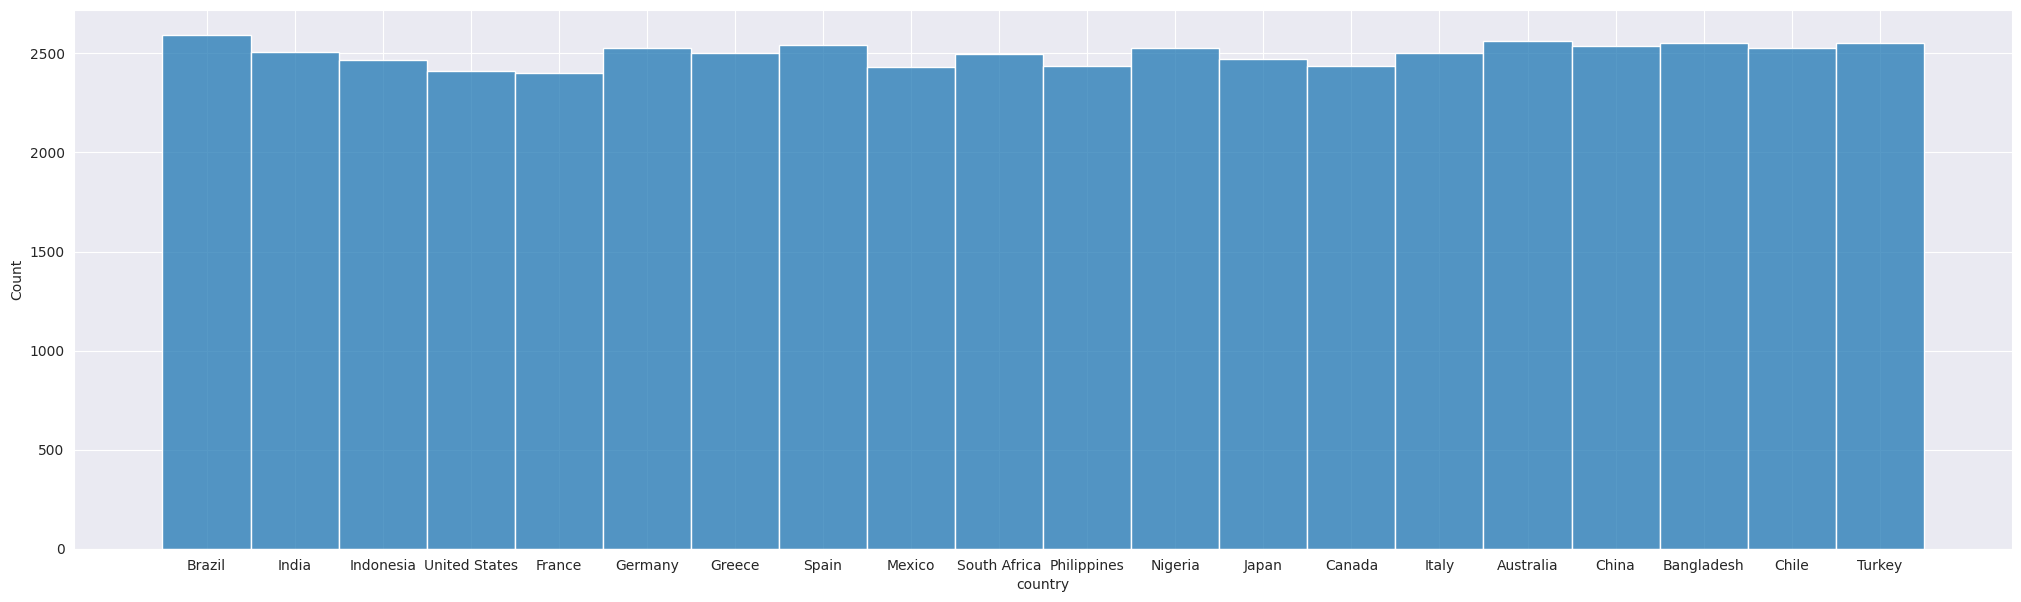

In [ ]:
plt.figure(figsize=(25,7))
sns.histplot(df['country'], )
plt.show()

In [ ]:
print("disaster_type: ", df['disaster_type'].nunique())
print()
df['disaster_type'].unique()

disaster_type:  10



array(['Earthquake', 'Extreme Heat', 'Hurricane', 'Wildfire', 'Flood',
       'Storm Surge', 'Drought', 'Tornado', 'Landslide',
       'Volcanic Eruption'], dtype=object)

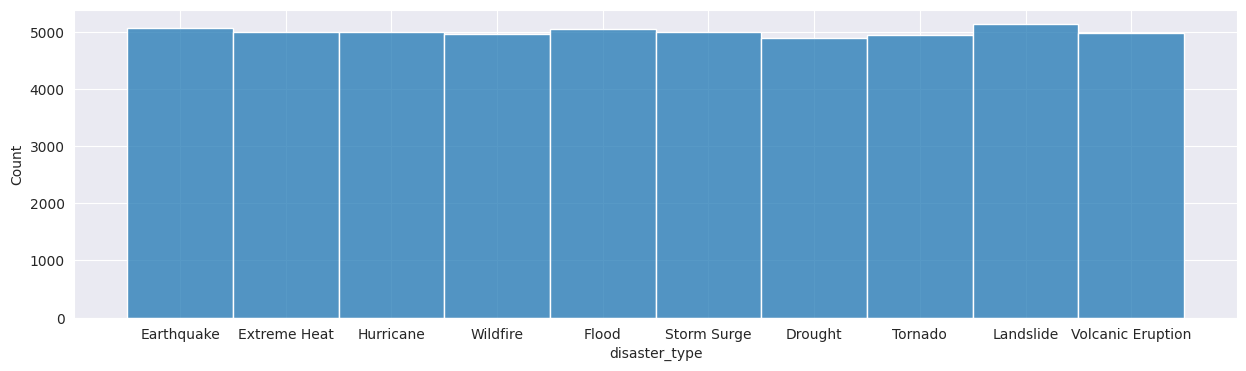

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(df['disaster_type'], )
plt.show()

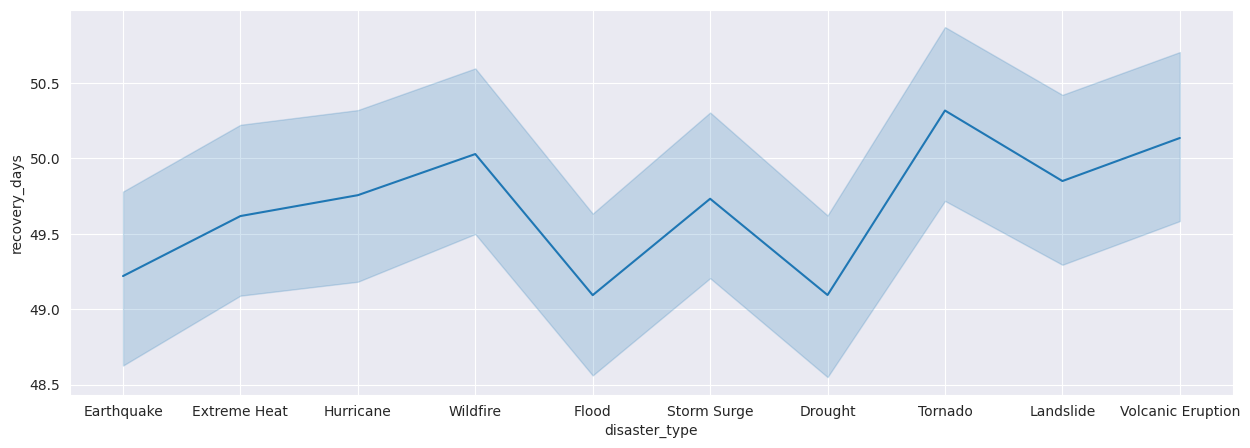

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='disaster_type', y= 'recovery_days', data=df )
plt.show()

In [ ]:
print("Min: ", df['recovery_days'].min())
print("Max: ", df['recovery_days'].max())

Min:  2
Max:  112


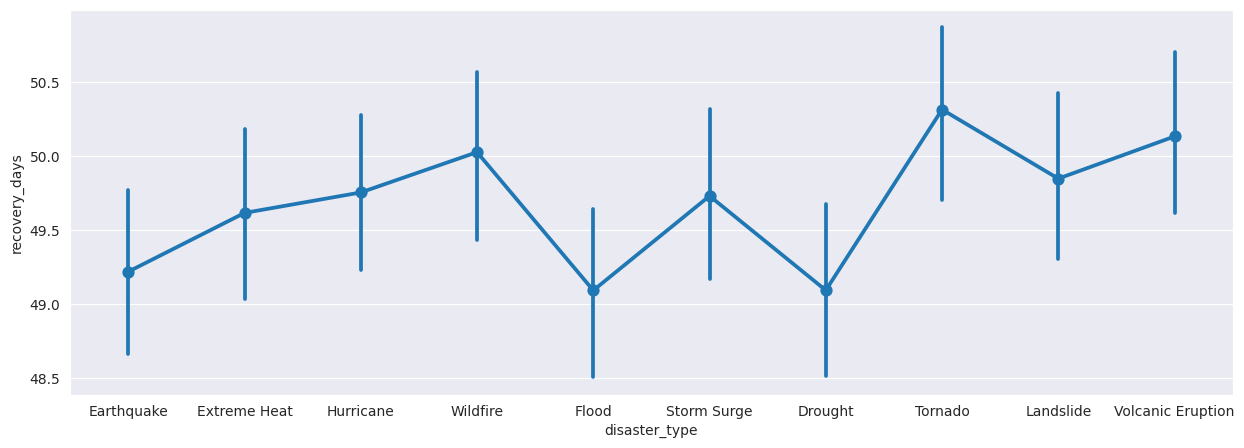

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x='disaster_type', y='recovery_days', data=df)
plt.show()


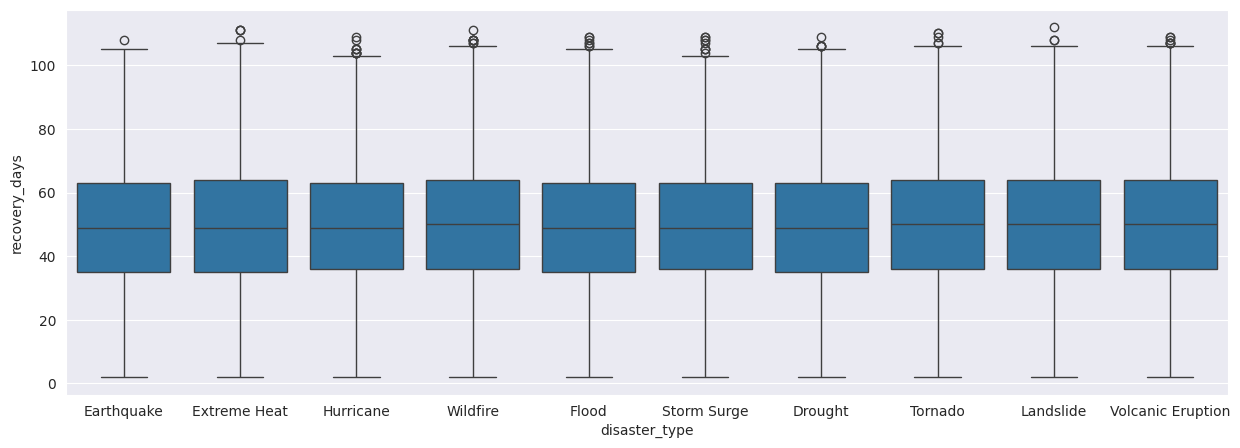

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='disaster_type', y='recovery_days', data=df)
plt.show()


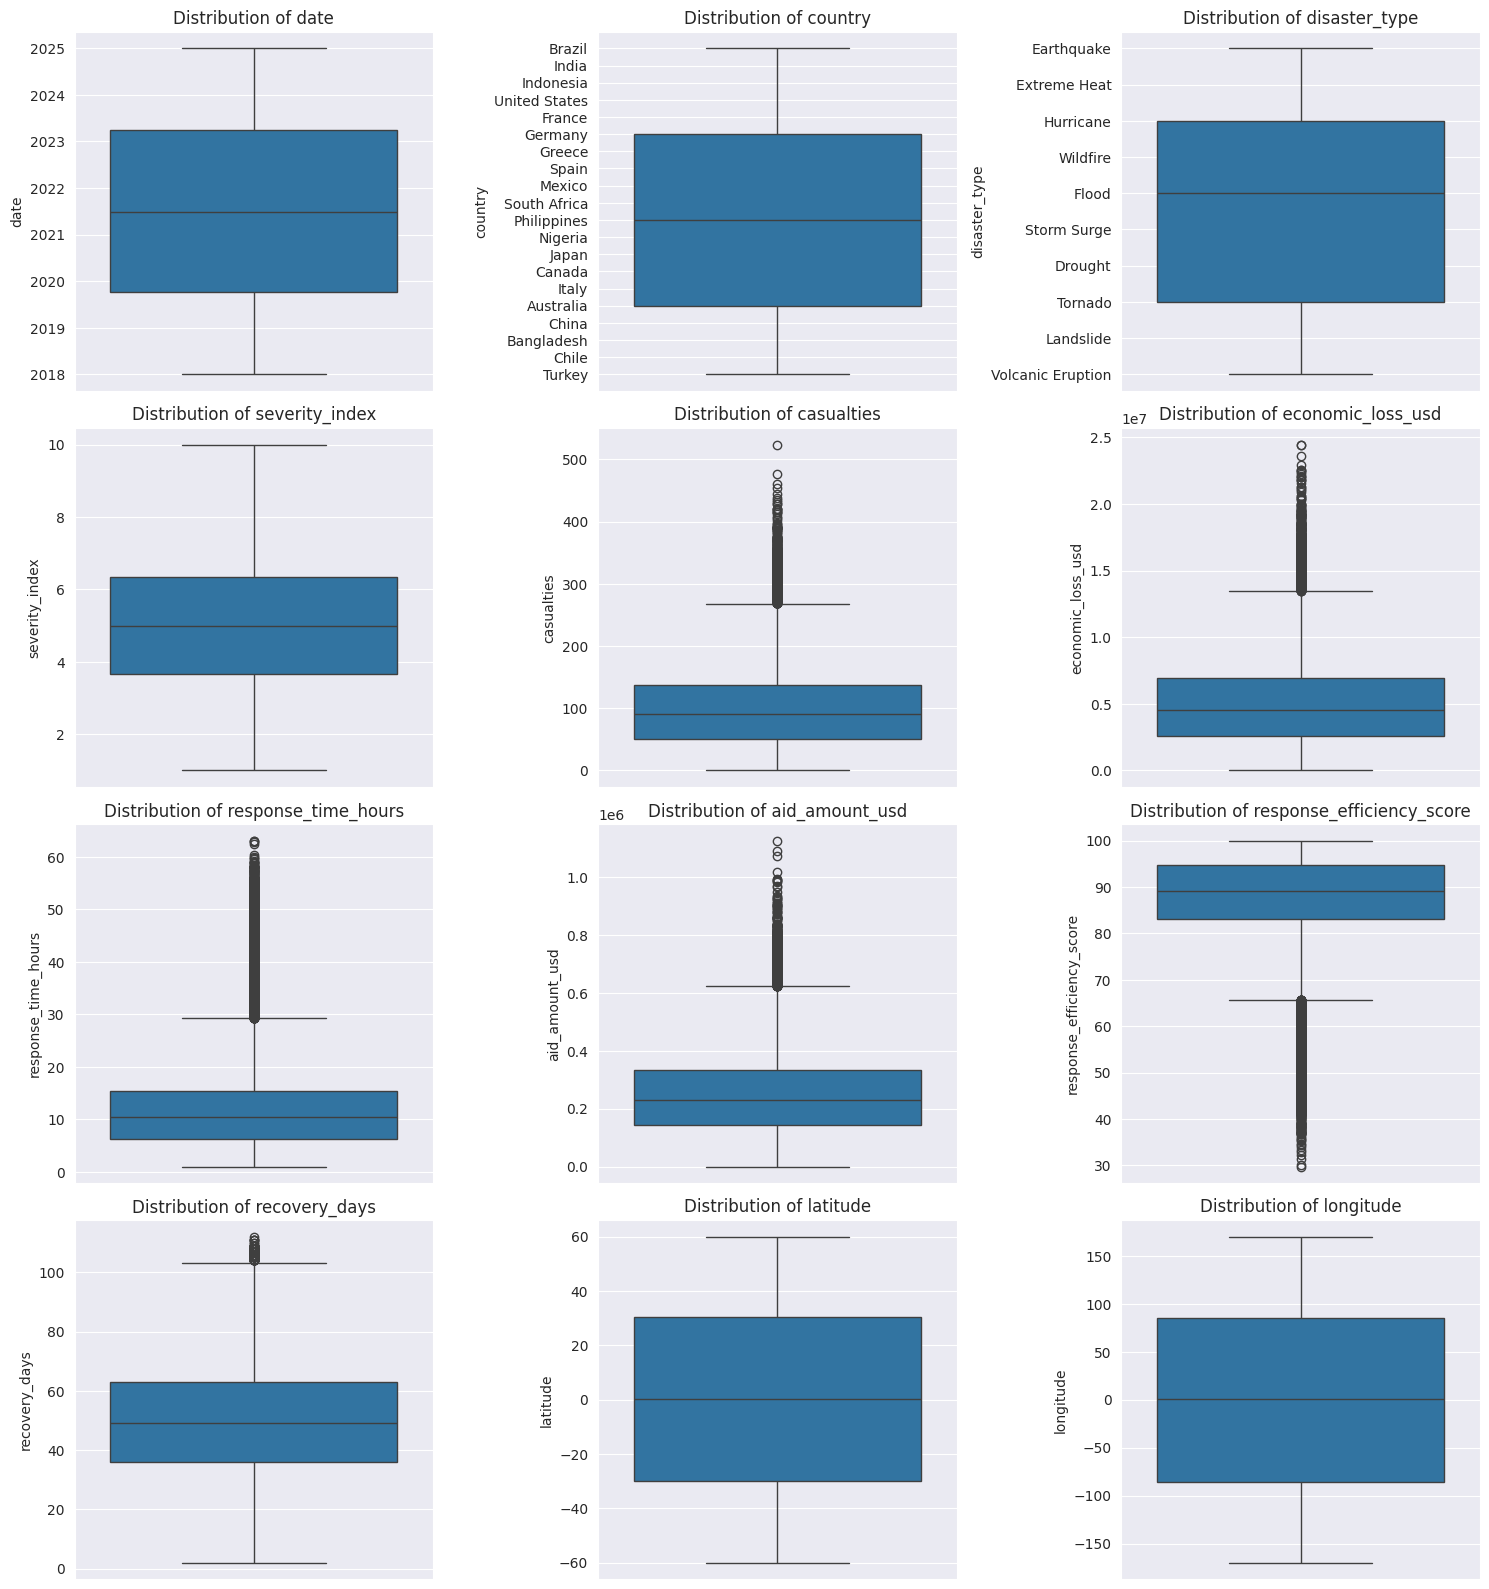

In [ ]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Remove outliers using the IQR method
for col in numeric_cols:
    Q_1 = df[col].quantile(0.25)
    Q_3 = df[col].quantile(0.75)
    IQR = Q_3 - Q_1

    Lower_bound = Q_1 - (1.5 * IQR)
    Upper_bound = Q_3 + (1.5 * IQR)

    df = df[(df[col] >= Lower_bound) & (df[col] <= Upper_bound)]

df.head(3)

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350


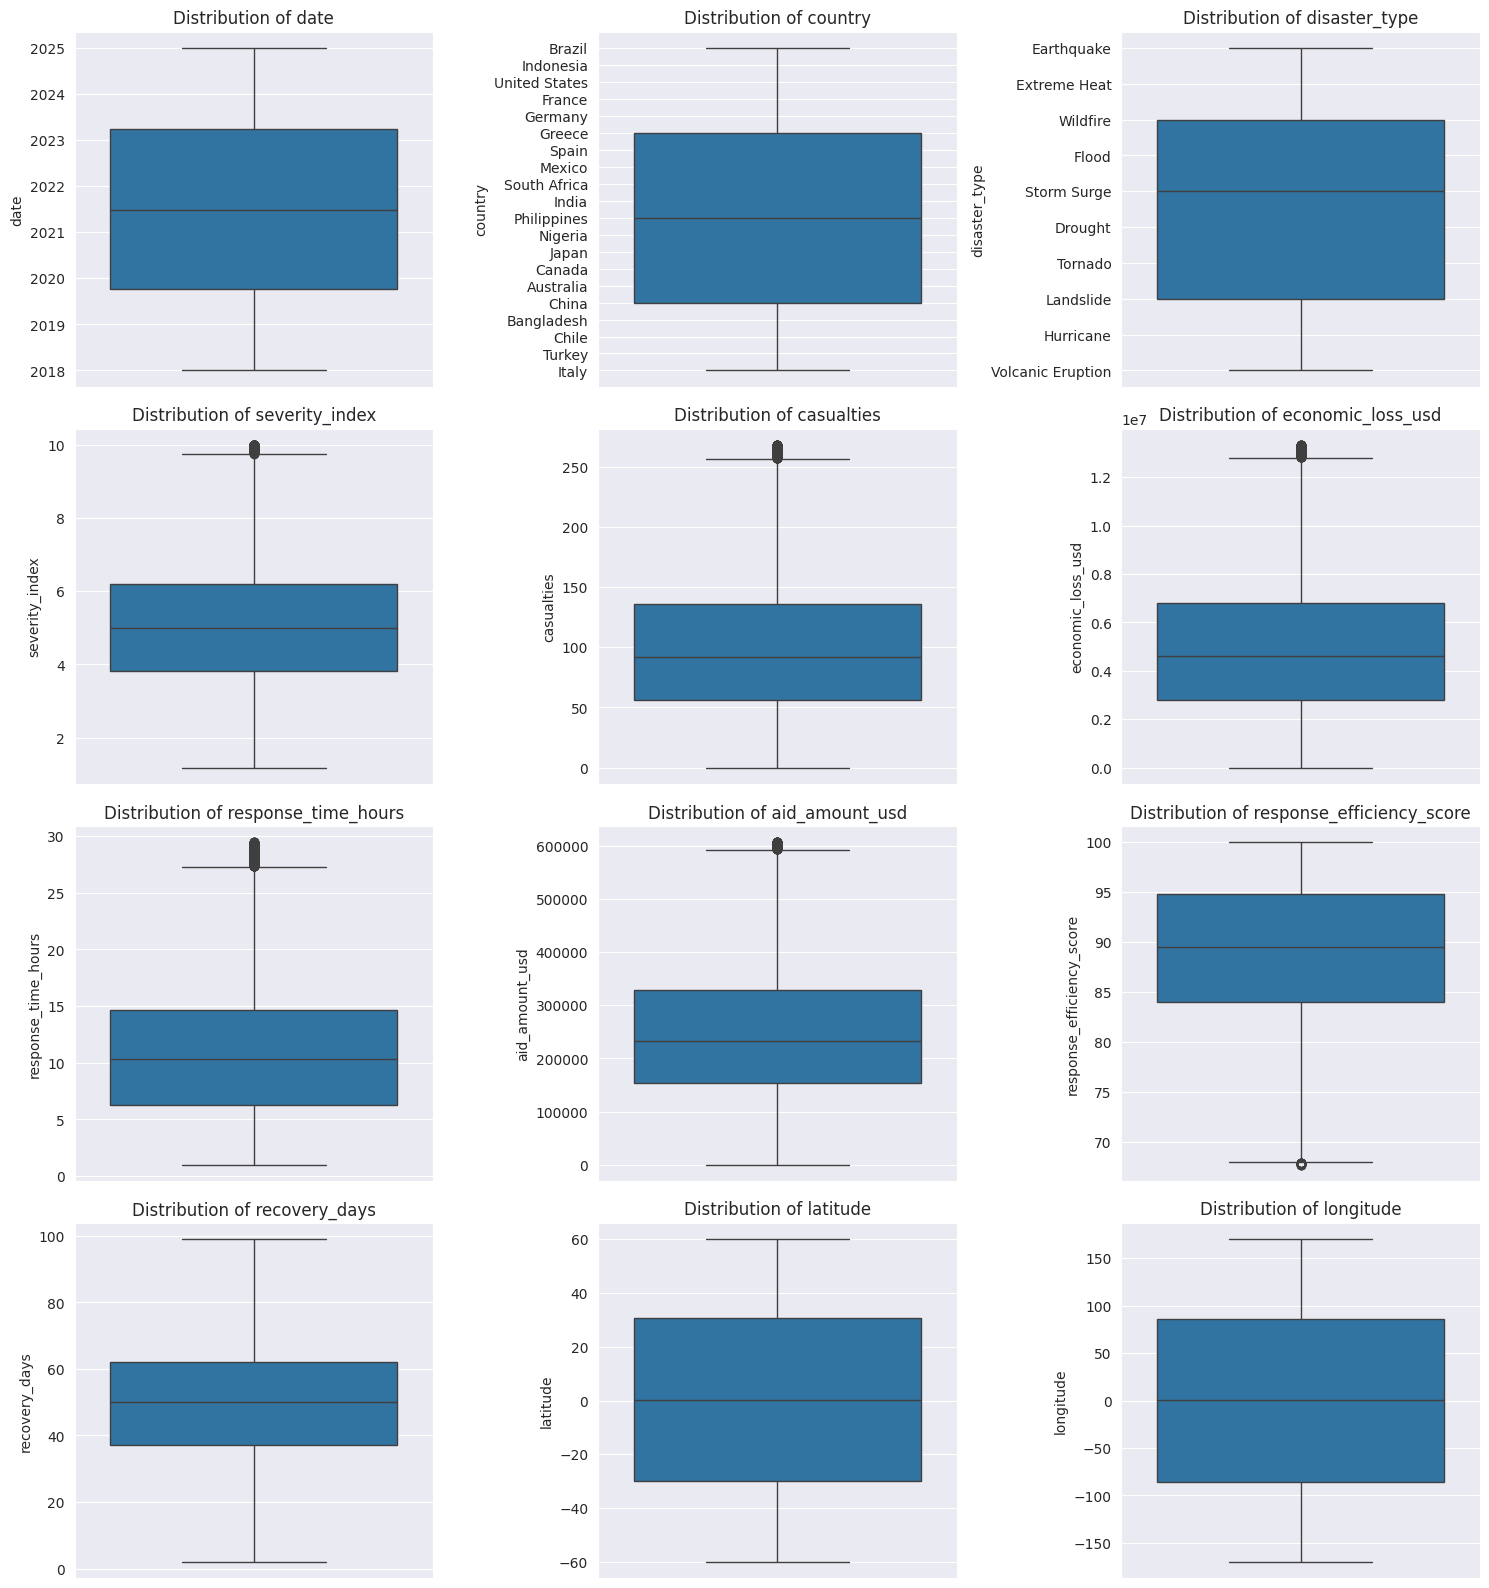

In [ ]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137
5,2019-01-15,France,Flood,2.56,56,51588.22,12.12,137988.29,91.57,26,-14.409,-47.947


In [ ]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()  # keep original df safe
df2.drop(['date','latitude', 'longitude'], axis=1, inplace=True)


cols_to_encode = ['country', 'disaster_type']

for c in cols_to_encode:
    le = LabelEncoder()
    df2[c] = le.fit_transform(df2[c])

df2.head()


,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days
0,2,1,5.99,111,7934365.71,15.62,271603.79,83.21,67
1,2,2,6.53,100,8307648.99,5.03,265873.81,96.18,55
3,10,2,4.55,94,1308251.31,7.83,237512.88,86.41,47
4,19,9,3.80,64,2655864.36,21.90,188910.69,72.81,42
5,6,3,2.56,56,51588.22,12.12,137988.29,91.57,26


***Correlation***

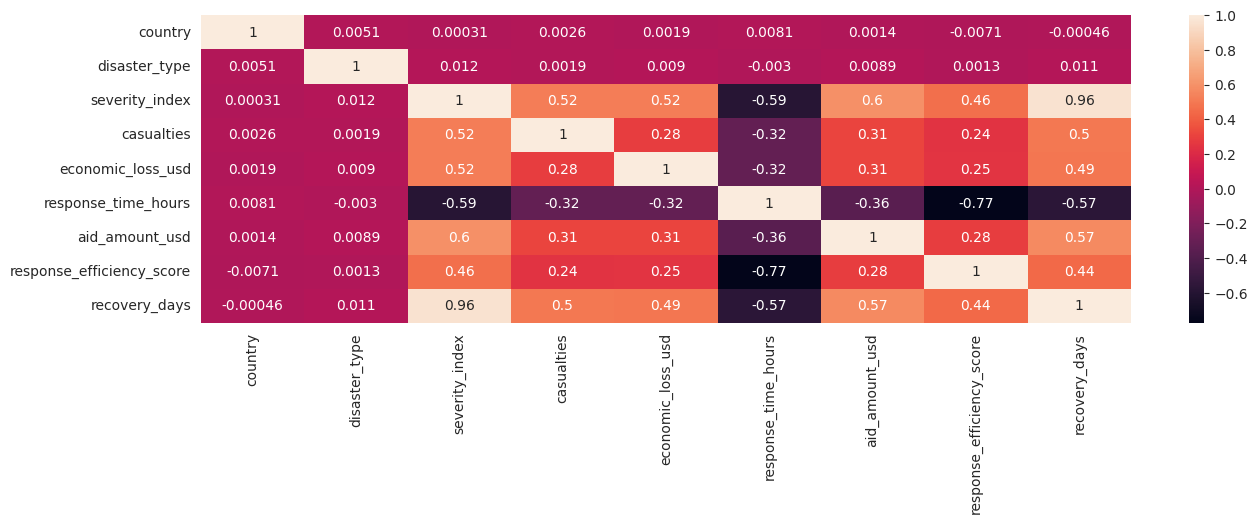

In [ ]:

plt.figure(figsize=(15,4))
sns.heatmap(df2.corr(), annot=True)

# from google.colab import files
# files.download("my_plot.png")

plt.show()


In [ ]:
df2.columns

Index(['country', 'disaster_type', 'severity_index', 'casualties',
       'economic_loss_usd', 'response_time_hours', 'aid_amount_usd',
       'response_efficiency_score', 'recovery_days'],
      dtype='object')


Running Forward Feature Selection...

Running Backward Feature Selection...


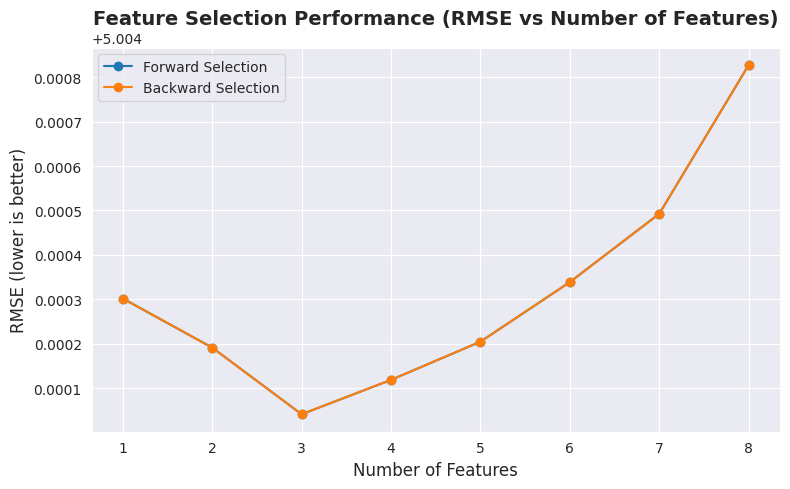


================ FEATURE SELECTION SUMMARY ================

Method: Forward
Best number of features: 3
Best features: ['severity_index', 'response_time_hours', 'response_efficiency_score']
Best CV MSE: 25.0404
Runtime: 5.24 sec

Method: Backward
Best number of features: 3
Best features: ['severity_index', 'response_time_hours', 'response_efficiency_score']
Best CV MSE: 25.0404
Runtime: 2.61 sec

Best Feature Selection Method: Forward
Selected Best Features: ['severity_index', 'response_time_hours', 'response_efficiency_score']

===================== MODEL PERFORMANCE =====================
Linear Regression: MSE = 25.4951
KNN: MSE = 32.0473
Decision Tree: MSE = 53.6008
Random Forest: MSE = 29.1079
Extra Trees: MSE = 31.8759
Gradient Boosting: MSE = 25.5665
AdaBoost: MSE = 26.2908
Bagging: MSE = 31.3266
SVR: MSE = 33.3520
SGD Regressor: MSE = 27935550.1293
MLP Neural Network: MSE = 25.5073

===================== SORTED MSE (ASC) =====================
Linear Regression: 25.4951
MLP Neur

In [ ]:
# =============================
# IMPORTS
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from tqdm import tqdm

# Regression models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    ExtraTreesRegressor, BaggingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Feature selection (SFS)
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import mean_squared_error

# =============================
# DATA
# =============================
X = df2.iloc[:, :-1]
y = df2['recovery_days']  # numeric → regression

# =============================
# SCALING
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =============================
# FEATURE SELECTION (SFS)
# =============================
results = []
method_scores = {}

for method, forward_flag in [('Forward', True), ('Backward', False)]:
    print(f"\nRunning {method} Feature Selection...")
    start_time = time.time()

    sfs = SequentialFeatureSelector(
        estimator=LinearRegression(),
        k_features='best',  # let SFS pick best subset internally
        forward=forward_flag,
        scoring='neg_mean_squared_error',
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )

    sfs.fit(X_scaled, y)

    # Collect all subset scores
    scores = []
    feature_sizes = sorted(sfs.subsets_.keys())
    best_score = float('inf')
    best_k = None
    best_features = None

    for k in feature_sizes:
        mse = -sfs.subsets_[k]['avg_score']  # convert negative MSE → positive
        scores.append(mse)
        if mse < best_score:
            best_score = mse
            best_k = k
            best_features = sfs.subsets_[k]['feature_idx']

    elapsed = round(time.time() - start_time, 2)
    selected_cols = X.columns[list(best_features)]
    method_scores[method] = scores

    results.append({
        "Method": method,
        "Best number of features": best_k,
        "Best feature names": list(selected_cols),
        "Best CV MSE": best_score,
        "Runtime (s)": elapsed
    })

# =============================
# FEATURE SELECTION LINE PLOT
# =============================
plt.figure(figsize=(8,5))
for method, scores in method_scores.items():
    plt.plot(range(1, len(scores)+1), np.sqrt(scores), marker='o', label=f"{method} Selection")
  # RMSE

plt.title("Feature Selection Performance (RMSE vs Number of Features)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("RMSE (lower is better)", fontsize=12)
plt.xticks(range(1, X.shape[1]+1))
plt.legend()
plt.tight_layout()
plt.show()

# =============================
# SHOW RESULTS
# =============================
print("\n================ FEATURE SELECTION SUMMARY ================")
for r in results:
    print(f"\nMethod: {r['Method']}")
    print(f"Best number of features: {r['Best number of features']}")
    print(f"Best features: {r['Best feature names']}")
    print(f"Best CV MSE: {r['Best CV MSE']:.4f}")
    print(f"Runtime: {r['Runtime (s)']} sec")

# Pick best method overall (lower MSE = better)
best_method = min(results, key=lambda x: x["Best CV MSE"])["Method"]
best_features = (
    results[0]["Best feature names"] if best_method == "Forward"
    else results[1]["Best feature names"]
)

print("\nBest Feature Selection Method:", best_method)
print("Selected Best Features:", best_features)

# =============================
# TRAIN ALL REGRESSION MODELS USING BEST FEATURES
# =============================
X_best = df2[best_features]
y_best = df2['recovery_days']

models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "SVR": SVR(),
    "SGD Regressor": SGDRegressor(),
    "MLP Neural Network": MLPRegressor(max_iter=2000)
}

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_best, y_best, test_size=0.2, random_state=42
)

scores = {}

print("\n===================== MODEL PERFORMANCE =====================")
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        scores[name] = mse
        print(f"{name}: MSE = {mse:.4f}")
    except Exception as e:
        print(f"{name}: FAILED → {e}")

# Sort models (lower MSE = better)
sorted_scores = sorted(scores.items(), key=lambda x: x[1])

print("\n===================== SORTED MSE (ASC) =====================")
for name, score in sorted_scores:
    print(f"{name}: {score:.4f}")

best_model, best_score = sorted_scores[0]

print("\nBEST REGRESSION MODEL =", best_model)
print(f"MSE = {best_score:.4f}")


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44682 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    44682 non-null  int64  
 1   disaster_type              44682 non-null  int64  
 2   severity_index             44682 non-null  float64
 3   casualties                 44682 non-null  int64  
 4   economic_loss_usd          44682 non-null  float64
 5   response_time_hours        44682 non-null  float64
 6   aid_amount_usd             44682 non-null  float64
 7   response_efficiency_score  44682 non-null  float64
 8   recovery_days              44682 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 3.4 MB



 Running Forward Feature Selection...


100%|██████████| 8/8 [00:12<00:00,  1.51s/it]



 Running Backward Feature Selection...


100%|██████████| 8/8 [00:15<00:00,  1.89s/it]


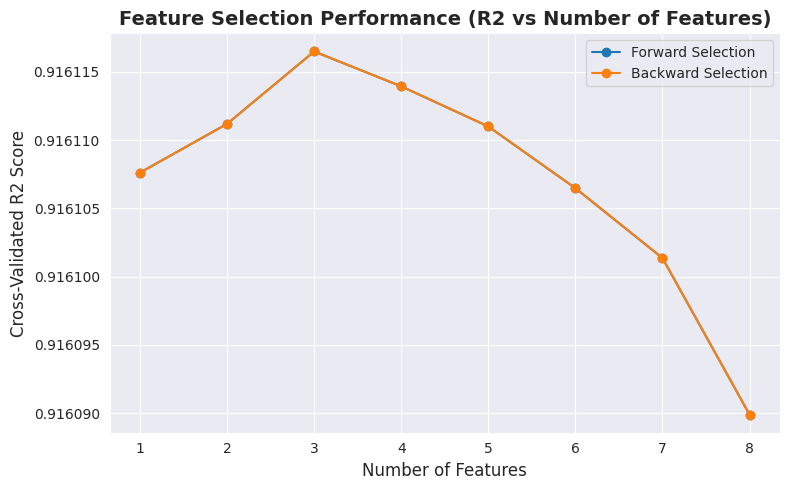


================ FEATURE SELECTION SUMMARY ================

Method: Forward
Best number of features: 3
Best features: ['severity_index', 'response_time_hours', 'response_efficiency_score']
Best R2 Score: 0.9161
Runtime: 12.11 sec

Method: Backward
Best number of features: 3
Best features: ['severity_index', 'response_time_hours', 'response_efficiency_score']
Best R2 Score: 0.9161
Runtime: 15.1 sec

 Best Feature Selection Method: Forward
 Selected Best Features: ['severity_index', 'response_time_hours', 'response_efficiency_score']

===================== MODEL PERFORMANCE =====================
Linear Regression: R2 Score = 0.9166
Ridge: R2 Score = 0.9166
Lasso: R2 Score = 0.9152
Decision Tree Regressor: R2 Score = 0.8248
Random Forest Regressor: R2 Score = 0.9049
Extra Trees Regressor: R2 Score = 0.8954
Gradient Boosting Regressor: R2 Score = 0.9164
AdaBoost Regressor: R2 Score = 0.9133
Bagging Regressor: R2 Score = 0.8977
SVR: R2 Score = 0.8909
SGD Regressor: R2 Score = -410781.7677

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from tqdm import tqdm

# Regression models (fixed)
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, SGDRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    ExtraTreesRegressor, BaggingRegressor
)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Feature selection (SFS)
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold                   # FIXED
from sklearn.metrics import r2_score                       # FIXED

# =============================
# DATA
# =============================
X = df2.iloc[:, :-1]
y = df2['recovery_days']

# =============================
# SCALING
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Regression model for SFS (FIXED)
lr = LinearRegression()

# Use normal KFold (Stratified is invalid for regression)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
method_scores = {}

# =============================
# FEATURE SELECTION
# =============================
for method, forward_flag in [('Forward', True), ('Backward', False)]:
    print(f"\n Running {method} Feature Selection...")
    start_time = time.time()

    best_score = -9999
    best_k = None
    best_features = None
    scores = []

    for k in tqdm(range(1, X.shape[1] + 1)):
        sfs = SequentialFeatureSelector(
            estimator=lr,
            k_features=k,
            forward=forward_flag,
            scoring='r2',             # FIXED
            cv=cv,
            n_jobs=-1
        )

        sfs.fit(X_scaled, y)
        scores.append(sfs.k_score_)

        if sfs.k_score_ > best_score:
            best_score = sfs.k_score_
            best_k = k
            best_features = sfs.k_feature_idx_

    elapsed = round(time.time() - start_time, 2)
    selected_cols = X.columns[list(best_features)]
    method_scores[method] = scores

    results.append({
        "Method": method,
        "Best number of features": best_k,
        "Best feature names": list(selected_cols),
        "Best cross-validated accuracy": best_score,
        "Runtime (s)": elapsed
    })

# =============================
# FEATURE SELECTION LINE PLOT
# =============================
plt.figure(figsize=(8,5))
for method, scores in method_scores.items():
    plt.plot(range(1, len(scores)+1), scores, marker='o', label=f"{method} Selection")

plt.title("Feature Selection Performance (R2 vs Number of Features)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Cross-Validated R2 Score", fontsize=12)
plt.xticks(range(1, X.shape[1]+1))
plt.legend()
plt.tight_layout()
plt.show()

# =============================
# SHOW RESULTS
# =============================
print("\n================ FEATURE SELECTION SUMMARY ================")
for r in results:
    print(f"\nMethod: {r['Method']}")
    print(f"Best number of features: {r['Best number of features']}")
    print(f"Best features: {r['Best feature names']}")
    print(f"Best R2 Score: {r['Best cross-validated accuracy']:.4f}")
    print(f"Runtime: {r['Runtime (s)']} sec")

# Pick best method overall
all_scores = [(r["Method"], r["Best cross-validated accuracy"]) for r in results]
best_method = max(all_scores, key=lambda x: x[1])[0]

best_features = results[0]["Best feature names"] if best_method == "Forward" else results[1]["Best feature names"]

print("\n Best Feature Selection Method:", best_method)
print(" Selected Best Features:", best_features)

# =============================
# TRAIN ALL REGRESSION MODELS USING BEST FEATURES  (FIXED)
# =============================
X_best = df2[best_features]
y_best = df2['recovery_days']

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "SVR": SVR(),
    "SGD Regressor": SGDRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=2000)
}

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_best, y_best, test_size=0.2, random_state=42
)

scores = {}

print("\n===================== MODEL PERFORMANCE =====================")
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)   # FIXED
        scores[name] = r2
        print(f"{name}: R2 Score = {r2:.4f}")
    except:
        print(f"{name}: FAILED")

# Sort scores (descending)
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print("\n===================== SORTED R2 SCORE (DESC) =====================")
for name, score in sorted_scores:
    print(f"{name}: {score:.4f}")

best_model, best_score = sorted_scores[0]

print("\n BEST REGRESSION MODEL =", best_model)
print(f" R2 Score = {best_score:.4f}")


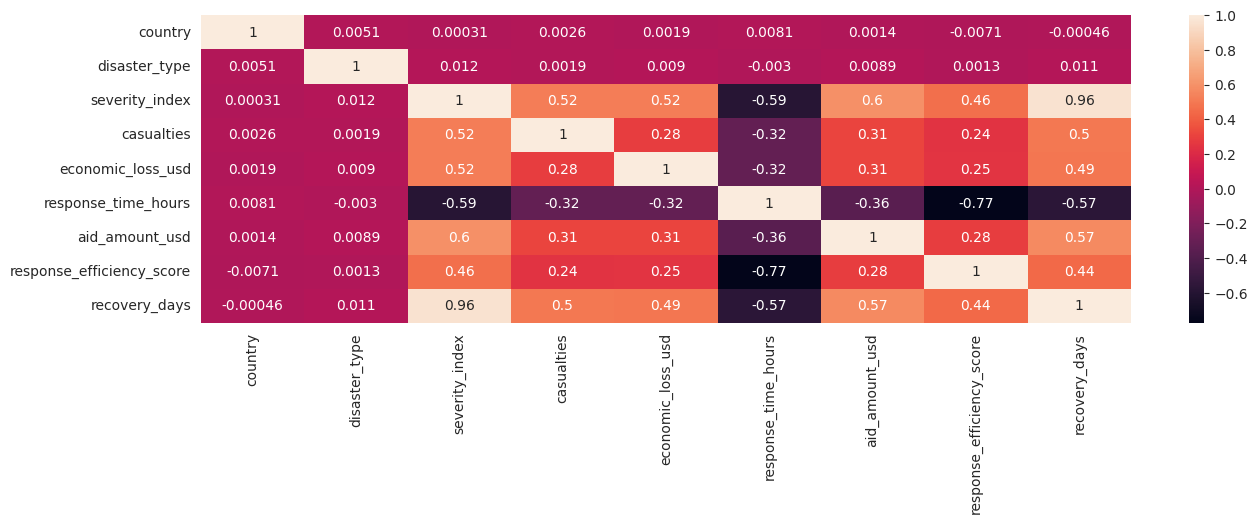

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(df2.corr(), annot=True)

# from google.colab import files
# files.download("my_plot.png")

plt.show()


In [ ]:
df2.head()

,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days
0,2,1,5.99,111,7934365.71,15.62,271603.79,83.21,67
1,2,2,6.53,100,8307648.99,5.03,265873.81,96.18,55
3,10,2,4.55,94,1308251.31,7.83,237512.88,86.41,47
4,19,9,3.80,64,2655864.36,21.90,188910.69,72.81,42
5,6,3,2.56,56,51588.22,12.12,137988.29,91.57,26


In [ ]:
df2.columns

Index(['country', 'disaster_type', 'severity_index', 'casualties',
       'economic_loss_usd', 'response_time_hours', 'aid_amount_usd',
       'response_efficiency_score', 'recovery_days'],
      dtype='object')

In [ ]:
df3 = df2[['severity_index','casualties',
       'economic_loss_usd','aid_amount_usd',
       'response_efficiency_score', 'recovery_days']]
df3.head()

,severity_index,casualties,economic_loss_usd,aid_amount_usd,response_efficiency_score,recovery_days
0,5.99,111,7934365.71,271603.79,83.21,67
1,6.53,100,8307648.99,265873.81,96.18,55
3,4.55,94,1308251.31,237512.88,86.41,47
4,3.80,64,2655864.36,188910.69,72.81,42
5,2.56,56,51588.22,137988.29,91.57,26


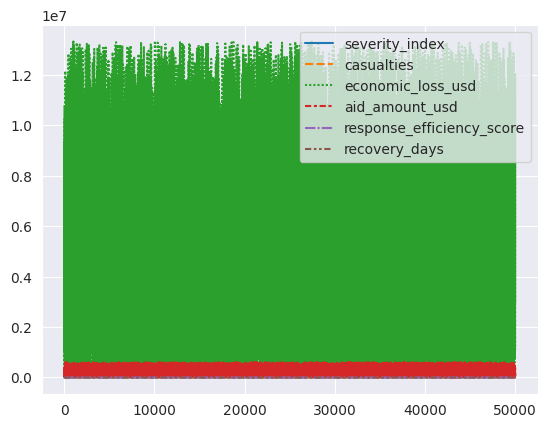

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df3)
plt.show()

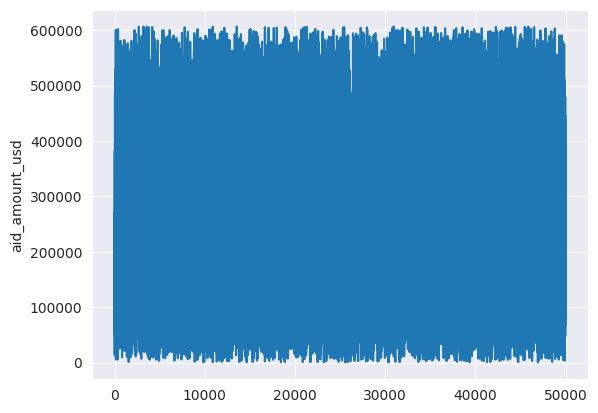

In [ ]:
sns.lineplot(data=df3['aid_amount_usd'])
plt.show()

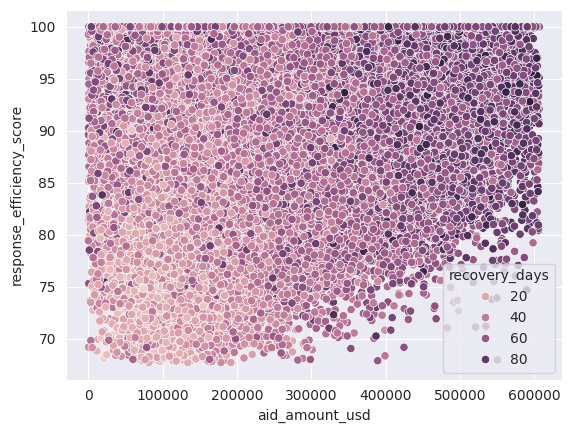

In [ ]:
sns.scatterplot(data=df3, x='aid_amount_usd', y='response_efficiency_score', hue='recovery_days')
plt.show()

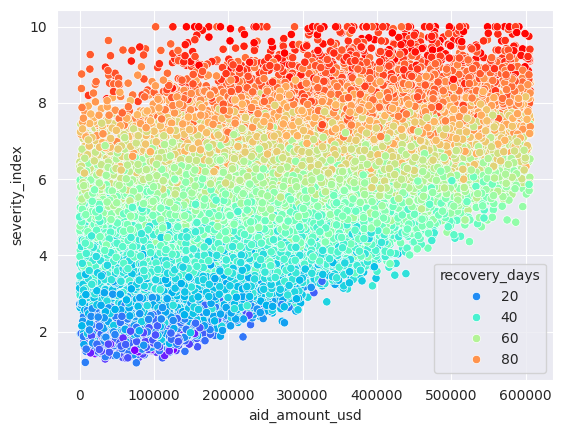

In [ ]:
sns.scatterplot(data=df3, x='aid_amount_usd', y='severity_index', hue='recovery_days', palette='rainbow')
plt.show()

In [62]:
from sklearn.model_selection import  train_test_split

x = df3.drop('recovery_days', axis=1)
y = df3['recovery_days']

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

***Linear Regression Model***

In [64]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

print(f"Your model Acurency is: {(lr_model.score(x_train, y_train))*100:.4f}%")


Your model Acurency is: 91.6033%
